In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from datetime import datetime
from sklearn.model_selection import train_test_split

In [4]:
img_d = ImageDataGenerator(rescale=1/255)

In [5]:
dataset = img_d.flow_from_directory('../input/brain-tumor-classification-mri/Training')

Found 2870 images belonging to 4 classes.


In [6]:
dataset.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [7]:
labels = pd.DataFrame(dataset.classes)
labels.value_counts()

3    827
0    826
1    822
2    395
dtype: int64

In [8]:
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
2865,3
2866,3
2867,3
2868,3


In [9]:
train = '../input/brain-tumor-classification-mri/Training'
test = '../input/brain-tumor-classification-mri/Testing'

In [10]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [12]:
train_data = train_datagen.flow_from_directory(
                    train,
                    subset='training',
                    target_size=(200,200),
                    batch_size=32)

Found 2297 images belonging to 4 classes.


In [13]:
val_data = train_datagen.flow_from_directory(
                    train,
                    subset='validation',
                    target_size=(200,200),
                    batch_size=32)

Found 573 images belonging to 4 classes.


In [14]:
test_data = train_datagen.flow_from_directory(
                    test,
                    target_size=(200,200),
                    batch_size=32)

Found 394 images belonging to 4 classes.


In [15]:
from keras import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout,Conv2D,MaxPool2D

In [16]:
model = Sequential()


#convolution and maxpoollayer


model.add(Conv2D(filters=75,kernel_size=3,
                 strides=2,padding='valid',input_shape=(200,200,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=50,kernel_size=2,
                 strides=2,padding='valid',input_shape=(200,200,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))




#flatten layer
model.add(Flatten())

#hidden layer


model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))


#output layer
model.add(Dense(4))
model.add(Activation('softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 75)        2100      
_________________________________________________________________
activation (Activation)      (None, 99, 99, 75)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        15050     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

2022-10-07 18:25:43.546928: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_data ,epochs=64, validation_data=val_data)

2022-10-07 18:25:44.115968: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/64
72/72 [==============================] - 33s 448ms/step - loss: 1.2031 - accuracy: 0.4689 - val_loss: 1.3766 - val_accuracy: 0.3735
Epoch 2/64
72/72 [==============================] - 24s 336ms/step - loss: 1.0269 - accuracy: 0.5503 - val_loss: 1.2651 - val_accuracy: 0.3281
Epoch 3/64
72/72 [==============================] - 25s 345ms/step - loss: 0.7899 - accuracy: 0.6805 - val_loss: 1.3251 - val_accuracy: 0.4590
Epoch 4/64
72/72 [==============================] - 24s 339ms/step - loss: 0.6786 - accuracy: 0.7314 - val_loss: 1.0962 - val_accuracy: 0.4869
Epoch 5/64
72/72 [==============================] - 24s 334ms/step - loss: 0.5359 - accuracy: 0.7884 - val_loss: 1.1000 - val_accuracy: 0.5410
Epoch 6/64
72/72 [==============================] - 24s 333ms/step - loss: 0.4668 - accuracy: 0.8237 - val_loss: 1.0069 - val_accuracy: 0.6265
Epoch 7/64
72/72 [==============================] - 24s 333ms/step - loss: 0.4023 - accuracy: 0.8437 - val_loss: 1.2256 - val_accuracy: 0.5864

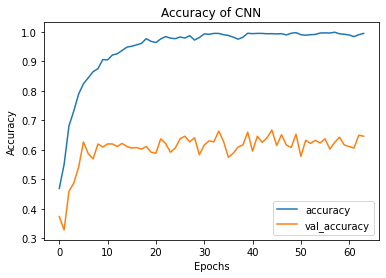

In [23]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy of CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

In [24]:
model.evaluate(train_data)

72/72 [==============================] - 14s 193ms/step - loss: 0.0108 - accuracy: 0.9961


[0.01079142652451992, 0.9960818290710449]

In [25]:
model.evaluate(test_data)

13/13 [==============================] - 2s 162ms/step - loss: 5.9353 - accuracy: 0.6675


[5.935330390930176, 0.6675127148628235]

In [22]:
y_predicte=model.predict(test_data)